In [1]:
# Telecom Churn Analysis

In [2]:
# 1 - Define the problem - Churn Analysis
# 2 - Data Collection - IBM Telecom Dataset
# 3 - Data Cleaning - missing values, duplicate, outliers , data transform
# 4 - EDA
# 5 - Visualization
# 6 - Anlysis Insights & Report

In [3]:
# loading the libraries


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# lets load the dataset

In [6]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.shape

(7043, 21)

In [10]:
# the dataset contain 7043 rowsa indicates customers
# and 21 columns indicate various attributes related to demograaphic,
# services and billing information of customers
#

In [11]:
#check for the dtypes of all fetures

In [12]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [13]:
# total charges store as object which seems incorrect
# we need to convert it to float for proper analysis


In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [18]:
df['TotalCharges'].dtype

dtype('float64')

In [20]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [22]:
#we have two option
# delete or drop - it will drop 11 customers data also
# replace with median(it may contain outlier)

In [23]:
df['TotalCharges'].median()

1397.475

In [24]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [25]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [26]:
#check the duplicate records

In [28]:
df.duplicated().sum()

np.int64(0)

In [29]:
# every categorical columns - how much unique values

In [30]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [31]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
categorical_col = [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod',  'Churn']

In [33]:
for i in categorical_col:
  print(f"unique values in {i} is :-")
  print(df[i].unique(), '\n')


unique values in gender is :-
['Female' 'Male'] 

unique values in SeniorCitizen is :-
[0 1] 

unique values in Partner is :-
['Yes' 'No'] 

unique values in Dependents is :-
['No' 'Yes'] 

unique values in PhoneService is :-
['No' 'Yes'] 

unique values in MultipleLines is :-
['No phone service' 'No' 'Yes'] 

unique values in InternetService is :-
['DSL' 'Fiber optic' 'No'] 

unique values in OnlineSecurity is :-
['No' 'Yes' 'No internet service'] 

unique values in OnlineBackup is :-
['Yes' 'No' 'No internet service'] 

unique values in DeviceProtection is :-
['No' 'Yes' 'No internet service'] 

unique values in TechSupport is :-
['No' 'Yes' 'No internet service'] 

unique values in StreamingTV is :-
['No' 'Yes' 'No internet service'] 

unique values in StreamingMovies is :-
['No' 'Yes' 'No internet service'] 

unique values in Contract is :-
['Month-to-month' 'One year' 'Two year'] 

unique values in PaperlessBilling is :-
['Yes' 'No'] 

unique values in PaymentMethod is :-
['Electr

In [34]:
#we have oly 2 numerical col.
# monthlycharge , total  charge

In [35]:
#lets check fo the outlier

<Axes: xlabel='TotalCharges'>

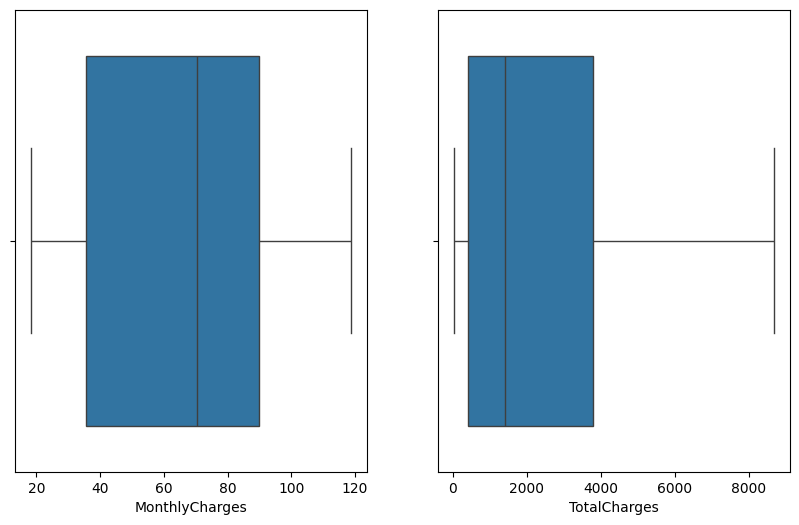

In [36]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(data=df, x='MonthlyCharges')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='TotalCharges')

In [37]:
# describe numerical data

In [39]:
df[['TotalCharges', 'MonthlyCharges', 'tenure']].describe()

,TotalCharges,MonthlyCharges,tenure
count,7043.000000,7043.000000,7043.000000
mean,2281.916928,64.761692,32.371149
std,2265.270398,30.090047,24.559481
min,18.800000,18.250000,0.000000
25%,402.225000,35.500000,9.000000
50%,1397.475000,70.350000,29.000000
75%,3786.600000,89.850000,55.000000
max,8684.800000,118.750000,72.000000


Insights from the Summary Statistics:

TotalCharges:

Mean: The average total charge per customer is ₹2281.92.

Median: The middle value is ₹1397.48, which is significantly lower than the mean, indicating a right-skewed distribution.

Min & Max: The minimum total charge is ₹18.80, and the maximum is ₹8684.80, suggesting there are significant variations in the total charges.

Standard Deviation: The high standard deviation (₹2265.27) indicates that total charges vary widely from the mean, with some customers likely having very high charges compared to others.

MonthlyCharges:

Mean: The average monthly charge is ₹64.76.

Median: The median is ₹70.35, which is slightly higher than the mean, indicating that a higher portion of customers have higher monthly charges.

Min & Max: The minimum monthly charge is ₹18.25, and the maximum is ₹118.75. This range is relatively narrow compared to TotalCharges, suggesting more consistency in the monthly charges.

Standard Deviation: The standard deviation is ₹30.09, showing that there is moderate variability in monthly charges.

tenure:

Mean: The average customer tenure is 32.37 months, implying that customers tend to stay with the service for a moderate duration.

Median: The median is 29 months, which is slightly lower than the mean, suggesting that there may be a few long-term customers who increase the average tenure.

Min & Max: The minimum tenure is 0 months (possibly a customer who just started or is new) and the maximum is 72 months, indicating the maximum duration of customer relationships.

Standard Deviation: The standard deviation (24.56 months) is quite high, which suggests that customer tenure is highly variable.